# House Price Prediction

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Get the Data

In [2]:
data=pd.read_csv(r"Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.shape

(545, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Data Cleaning

In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Replace Value :

In [8]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
data.replace({'mainroad':{"yes":1, "no":0},
            'guestroom':{"yes":1,"no":0},
            'airconditioning':{"yes":1,"no":0}},inplace=True)

In [10]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,1,2,no,furnished


In [11]:
data.shape

(545, 13)

Split the data

In [12]:
X=data.drop(['stories','basement','hotwaterheating','prefarea','furnishingstatus','price'],axis=1)
Y=data['price']

In [13]:
X

,area,bedrooms,bathrooms,mainroad,guestroom,airconditioning,parking
0,7420,4,2,1,0,1,2
1,8960,4,4,1,0,1,3
2,9960,3,2,1,0,0,2
3,7500,4,2,1,0,1,3
4,7420,4,1,1,1,1,2
...,...,...,...,...,...,...,...
540,3000,2,1,1,0,0,2
541,2400,3,1,0,0,0,0
542,3620,2,1,1,0,0,0
543,2910,3,1,0,0,0,0


In [14]:
X.shape

(545, 7)

In [15]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [16]:
Y.shape

(545,)

Model Training

In [17]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [18]:
x_train,x_test,y_train,y_test = tts(X,Y,test_size=0.2,random_state=0)

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(436, 7) (109, 7) (436,) (109,)


Plot Heatmap

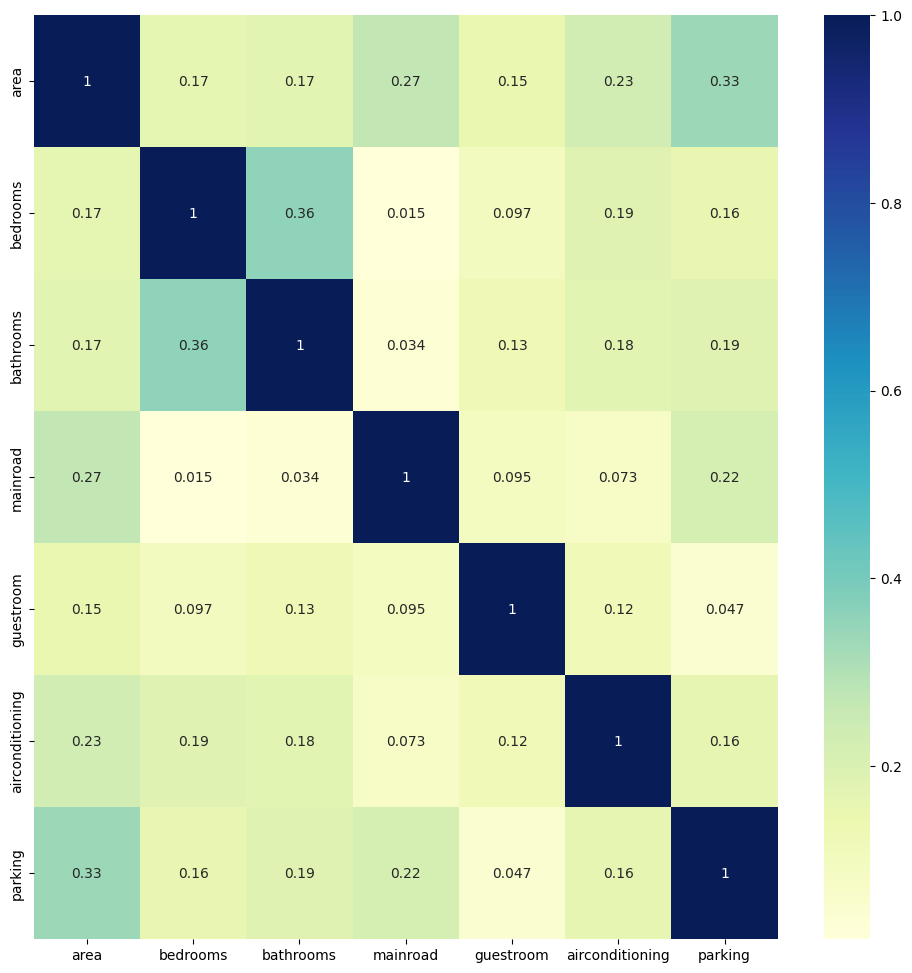

In [20]:
plt.figure(figsize = (12, 12))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

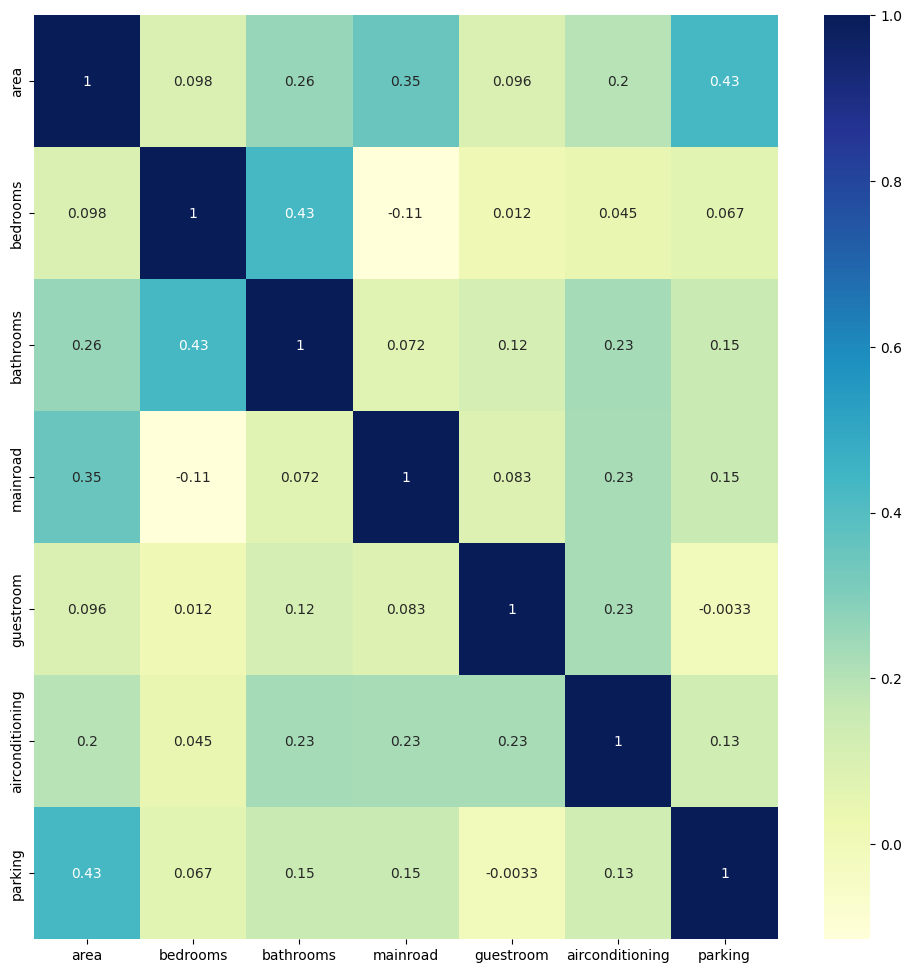

In [21]:
plt.figure(figsize = (12, 12))
sns.heatmap(x_test.corr(), annot = True, cmap="YlGnBu")
plt.show()

Train the Model

In [22]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['bedrooms']),
    remainder='passthrough'
)

In [23]:
scaler = StandardScaler()

In [24]:
lr = LinearRegression()

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [26]:
lr = LinearRegression()
lr.fit(x_scaled,Y)

LinearRegression()

In [27]:
pipe = make_pipeline(column_trans,scaler,lr)

In [28]:
pipe.fit(x_train,y_train)

C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['bedrooms'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
y_pred_lr = pipe.predict(x_test)
y_pred_lr

array([ 4030340.69058859,  5770628.69058859,  4625284.69058859,
        5775236.69058859,  2963332.69058859,  7295876.69058859,
        4238212.69058859,  3146628.69058859,  3202948.69058859,
        7835524.69058859,  6543236.69058859,  3771780.69058859,
        3636100.69058859,  5005188.69058859,  4309380.69058859,
        2620292.69058859,  3323780.69058859,  4318596.69058859,
        2798468.69058859,  4681604.69058859,  6803332.69058859,
        6351748.69058859,  5017988.69058859,  3171716.69058859,
        4425092.69058859,  6445956.69058859,  5074820.69058859,
        6121860.69058859,  6083972.69058859,  5395332.69058859,
        3438468.69058859,  4294532.69058859,  7091588.69058859,
        3343236.69058859,  2803588.69058859,  5444484.69058859,
        4825988.69058859,  3526532.69058859,  2809732.69058859,
        4198276.69058859,  7686532.69058859,  5049220.69058859,
        6474116.69058859,  4179332.69058859,  4150660.69058859,
        6527364.69058859,  5471108.69058

In [30]:
r2_score(y_test,y_pred_lr)

0.6083779739986747

using lasso

In [31]:
lasso = Lasso()

In [32]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [33]:
pipe.fit(x_train,y_train)

C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['bedrooms'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [34]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.6082590531877512

Use Ridge

In [35]:
ridge = Ridge()

In [36]:
pipe = make_pipeline(column_trans,scaler,ridge)

In [37]:
pipe.fit(x_train,y_train)

C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['bedrooms'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [38]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.6085922584701422

In [39]:
print("No Regularization :",r2_score(y_test,y_pred_lr))
print("Lasso :",r2_score(y_test,y_pred_lasso))
print("Ridge :",r2_score(y_test,y_pred_ridge))

No Regularization : 0.6083779739986747
Lasso : 0.6082590531877512
Ridge : 0.6085922584701422


Use Pickle

In [40]:
import pickle

In [41]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))

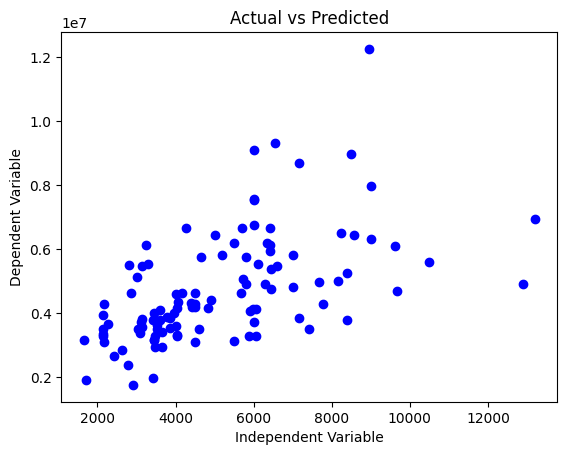

In [42]:
# Assuming X_test is a DataFrame with a single column for simple linear regression
X_test_single_feature = x_test.iloc[:, 0]

plt.scatter(X_test_single_feature, y_test, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()
